In [290]:
import numpy as np
import matplotlib.pyplot as plt

In [291]:
def f(x:float) -> float:
    k = np.sqrt(2)
    pi = np.pi
    return 8*(k - 1)*np.arctan(x) - pi*(k-1) - 2*x*(2*k - 1) + 7 - 4*k + x*x

def df(x:float) -> float:
    k = np.sqrt(2)
    pi = np.pi
    return 8*(k-1)/(1 + x**2) - 2*(2*k - 1) + 2*x

def d2f(x:float) -> float:
    k = np.sqrt(2)
    pi = np.pi
    return 8*(k-1)*(-2*x)/(1 + x**2)**2 + 2

def d3f(x:float) -> float:
    k = np.sqrt(2)
    pi = np.pi
    return 8*(k-1)*(2*x*2*(1 + x**2)*2*x - 2 * (1 + x**2)**2)/(1 + x**2)**4

[(-0.0002, 0.0006)]

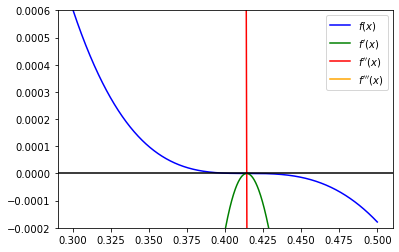

In [292]:
x_data = np.linspace(0.3, 0.5, 1000)
fig, axs = plt.subplots()
axs.plot(x_data, f(x_data), label="$f(x)$", color="blue")
axs.plot(x_data, df(x_data), label="$f'(x)$", color="green")
axs.plot(x_data, d2f(x_data), label="$f''(x)$", color="red")
axs.plot(x_data, d3f(x_data), label="$f'''(x)$", color="orange")
axs.legend()
ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='k')
axs.set(ylim=(-0.0002, 0.0006))
#fig.savefig("2.3_plot_d.png", dpi=500)

In [293]:
def Newton_method(root_loc:list, f, df, m=1) -> list:
    x = [(root_loc[0] + root_loc[1])/2]
    eps = 1e-12
    x.append(x[-1] - m*f(x[-1])/df(x[-1]))
    while np.abs(x[-1] - x[-2]) > eps:
        x.append(x[-1] - m*f(x[-1])/df(x[-1]))
    return x

In [294]:
d = [[0.4, 0.425], [1.2, 1.3]]

In [295]:
res = Newton_method(d[1], f, df)
print(len(res), res[-1], max(res), min(res), f(res[-1]))

6 1.2302155532993027 1.25 1.2302155532993027 4.440892098500626e-16


In [296]:
res = Newton_method(d[0], f, df, 3)
print(len(res), res[-1], max(res), min(res), f(res[-1]))

122 0.4142133527045863 24.41421356644915 -9.57772306471169 0.0


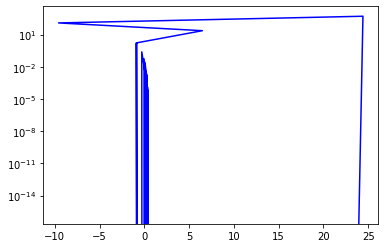

In [297]:
fig, axs = plt.subplots()
axs.plot(res, [f(i) for i in res], label="$f(x)$", color="blue")
plt.yscale('log')

In [298]:
res = Newton_method(d[0], d2f, d3f, 1)
print(len(res), res[-1], max(res), min(res), f(res[-1]))

5 0.41421356237309487 0.41421356237309487 0.4125 -3.885780586188048e-16


In [299]:
ans = [0.41420092158433786, 0.4142042003526383, 0.4142133527045863, 0.4142135436948857, 0.414213562325662, 0.41421356237309487]

In [300]:
def get_root(a, b, f):
    x = []
    left = a
    right = b
    eps = 1e-12
    while np.abs(left - right) > 2*eps:
        mid = (left + right) / 2
        x.append(mid)
        if f(mid) > 0:
            left = mid
        else:
            right = mid
    return x
        

In [301]:
res = get_root(0.4, 0.425, f)

In [302]:
print(len(res), res[-1], max(res), min(res), f(res[-1]))

34 0.41420254713302707 0.41874999999999996 0.4125 0.0
